In [4]:
# Importamos librerias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importamos el DataFrame.
path = "/content/drive/MyDrive/Skillnest/CORE/ventas_final.csv"
df = pd.read_csv(path)

In [7]:
# Visualizamos nuestro DataFrame.
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   transaction_id              1000 non-null   int64  
 1   date                        1000 non-null   object 
 2   customer_id                 1000 non-null   object 
 3   gender                      1000 non-null   object 
 4   age                         1000 non-null   int64  
 5   product_category            1000 non-null   object 
 6   quantity                    1000 non-null   int64  
 7   price_per_unit              1000 non-null   int64  
 8   total_amount                1000 non-null   int64  
 9   ingreso_total_calculado     1000 non-null   int64  
 10  categoria_venta             1000 non-null   object 
 11  media_por_categoria_genero  1000 non-null   float64
 12  desviacion_vs_media         1000 non-null   float64
dtypes: float64(2), int64(6), object(5)

In [8]:
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,ingreso_total_calculado,categoria_venta,media_por_categoria_genero,desviacion_vs_media
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150,Media,487.127660,-337.13
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000,Alta,467.097701,532.90
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30,Baja,466.104651,-436.10
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500,Media,419.802260,80.20
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100,Baja,487.127660,-387.13


**Exploración de Datos Avanzada**

Realiza un análisis de correlación y crea un mapa de calor para visualizar las relaciones entre las variables.

Crea subplots para comparar diferentes variables clave.

Añade cuadrículas, leyendas, anotaciones y flechas a tus gráficos para mejorar la claridad y la información.

In [9]:
#  Análisis de correlación y mapa de calor

# Para calcular la matriz de correlación, necesito solo las variables númericas, entonces las separare a continuación

cols_numericas = ["age","quantity","price_per_unit","total_amount","ingreso_total_calculado","media_por_categoria_genero","desviacion_vs_media"]

df_numeric = df[cols_numericas]

In [10]:
# Calcular matriz de correlación con método Pearson

correlation_matrix = df_numeric.corr(method='pearson')
print(correlation_matrix)

                                 age  quantity  price_per_unit  total_amount  \
age                         1.000000 -0.023737       -0.038423     -0.060568   
quantity                   -0.023737  1.000000        0.017501      0.373707   
price_per_unit             -0.038423  0.017501        1.000000      0.851925   
total_amount               -0.060568  0.373707        0.851925      1.000000   
ingreso_total_calculado    -0.060568  0.373707        0.851925      1.000000   
media_por_categoria_genero  0.026900 -0.025141        0.026021      0.036426   
desviacion_vs_media        -0.061589  0.374872        0.851542      0.999336   

                            ingreso_total_calculado  \
age                                       -0.060568   
quantity                                   0.373707   
price_per_unit                             0.851925   
total_amount                               1.000000   
ingreso_total_calculado                    1.000000   
media_por_categoria_genero   

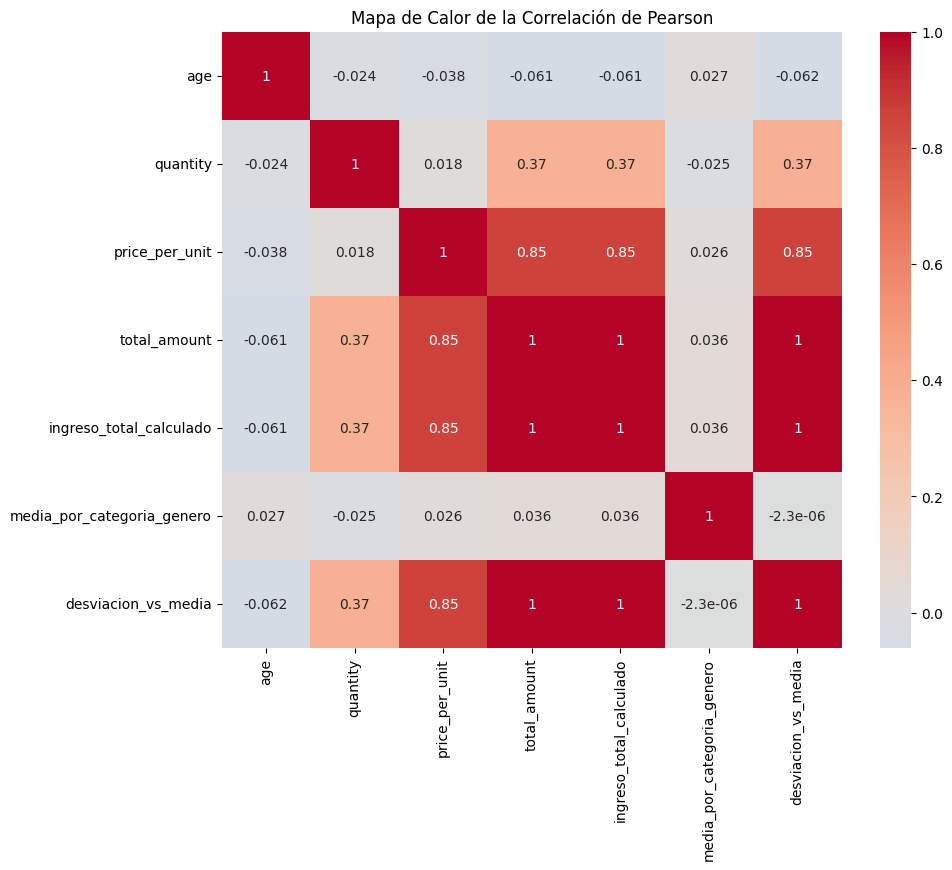

In [11]:
# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

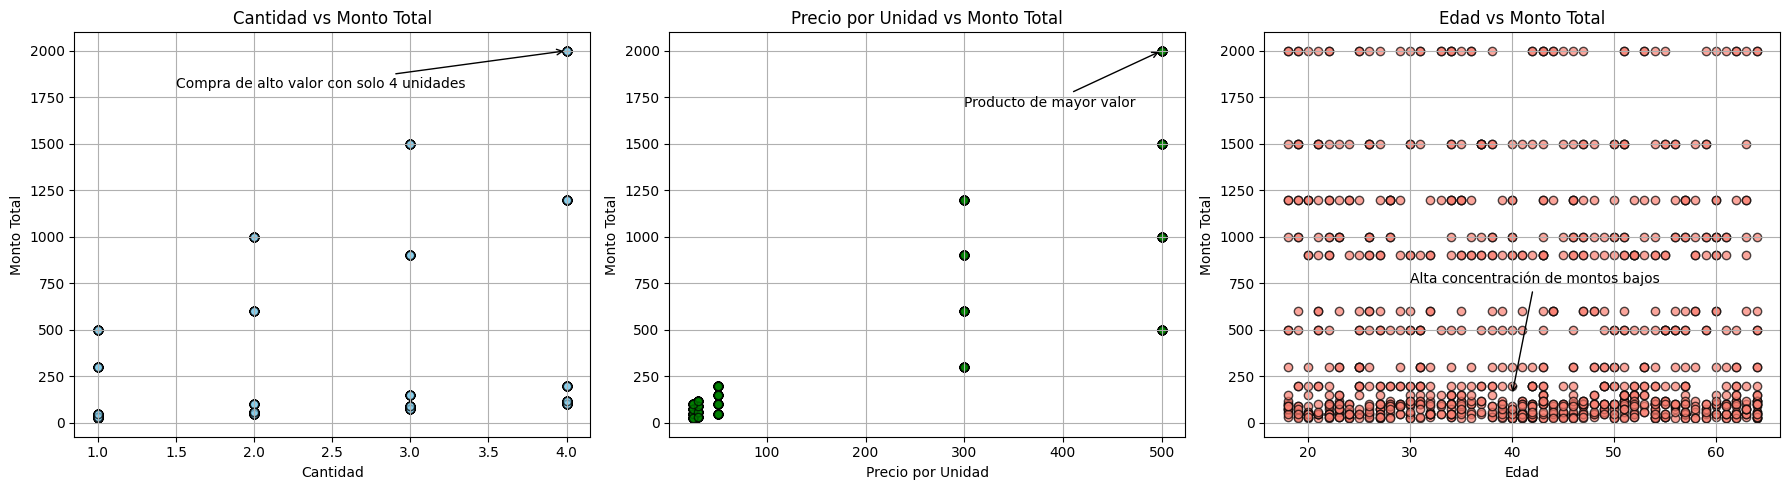

In [30]:
# Crear subplots para comparar variables clave

plt.figure(figsize=(18, 5))

# Subplot 1: quantity vs total_amount
plt.subplot(1, 3, 1)
plt.scatter(df["quantity"], df["total_amount"], alpha=0.7, color="skyblue", edgecolor="black")
plt.title("Cantidad vs Monto Total")
plt.xlabel("Cantidad")
plt.ylabel("Monto Total")
plt.grid(True)

# Flecha y anotación
plt.annotate(
    "Compra de alto valor con solo 4 unidades",
    xy=(4.0, 2000),       # Punto que señalamos
    xytext=(1.5, 1800),   # Ubicación del texto
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=10,
    color="black"
)

# Subplot 2: price_per_unit vs total_amount
plt.subplot(1, 3, 2)
plt.scatter(df["price_per_unit"], df["total_amount"], alpha=0.7, color="green", edgecolor="black")
plt.title("Precio por Unidad vs Monto Total")
plt.xlabel("Precio por Unidad")
plt.ylabel("Monto Total")
plt.grid(True)

# Flecha y anotación
plt.annotate(
    "Producto de mayor valor",
    xy=(500, 2000),          # Punto que señalamos
    xytext=(300, 1700),      # Ubicación del texto
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=10, color="black"
)

# Subplot 3: age vs total_amount
plt.subplot(1, 3, 3)
plt.scatter(df["age"], df["total_amount"], alpha=0.7, color="salmon", edgecolor="black")
plt.title("Edad vs Monto Total")
plt.xlabel("Edad")
plt.ylabel("Monto Total")
plt.grid(True)

# Flecha y anotación
plt.annotate(
    "Alta concentración de montos bajos",
    xy=(40, 150),            # Punto que señalamos
    xytext=(30, 750),        # Ubicación del texto
    arrowprops=dict(facecolor="black", arrowstyle="->"),
    fontsize=10, color="black"
)
plt.tight_layout()
plt.show()